<a href="https://colab.research.google.com/github/dikshaaswal/income_food_choices/blob/main/income_influence_on_food_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💾 The data

Your team gathered three datasets to analyze the relationship between income levels and food choices:

### Income-Expenditure
- **`Mthly_HH_Income`** – Monthly household income
- **`Mthly_HH_Expense`** – Total monthly household expenses
- **`No_of_Fly_Members`** – Number of family members
- **`Emi_or_Rent_Amt`** – Rent or loan payments
- **`Annual_HH_Income`** – Annual household income
- **`Highest_Qualified_Member`** – Education level of the most qualified household member
- **`No_of_Earning_Members`** – Number of income earners in the household

### Dietary Habits Survey Data
- **`Age`** – Age group of the respondent
- **`Gender`** – Male/Female
- **`Dietary Preference`** – Vegetarian, Non-Vegetarian, Vegan, etc.
- **`Meal Frequency`** – How often certain food types are consumed
- **`Food Restrictions`** – Allergies and dietary restrictions
- **`Beverage Intake`** – Hydration and drink preferences

### Food Prices
- **`Year`** – Year of data collection
- **`Month`** – Month of data collection
- **`Metroregion_code`** – Geographic area code
- **`EFPG_code`** – Food category (e.g., whole grains, processed foods)
- **`Attribute`** – Type of data recorded (e.g., price, purchase amount)
- **`Value`** – Numeric value of the recorded attribute

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Interpretation

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Define your data path once
data_path = Path("/content/drive/MyDrive/Colab Notebooks/data")

In [9]:
pwd

'/content'

## Income & Food Affordability

### Household income and expenses analysis

In [10]:
pwd

'/content'

In [11]:
income_expenditure = pd.read_csv(data_path / "Income-Expenditure.csv")

In [12]:
income_expenditure.shape

(50, 7)

In [13]:
income_expenditure.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [14]:
income_expenditure.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [15]:
#check for zero valued entries
income_expenditure['Mthly_HH_Income'].min()

5000

In [16]:
income_expenditure['total_expense'] = income_expenditure['Mthly_HH_Expense'] + income_expenditure['Emi_or_Rent_Amt']

In [17]:
income_expenditure['savings'] = income_expenditure['Mthly_HH_Income'] - income_expenditure['total_expense']

In [18]:
#per capita savings
income_expenditure['pcs' ]= (income_expenditure['savings']*1.0)/income_expenditure['No_of_Fly_Members']

In [19]:
income_expenditure.groupby('Highest_Qualified_Member')['Mthly_HH_Income'].mean()

,Mthly_HH_Income
Highest_Qualified_Member,
Graduate,40921.052632
Illiterate,25280.000000
Post-Graduate,59166.666667
Professional,52550.000000
Under-Graduate,29350.000000


In [20]:
income_expenditure.groupby('Highest_Qualified_Member')['savings'].mean()

,savings
Highest_Qualified_Member,
Graduate,20005.263158
Illiterate,9480.000000
Post-Graduate,26750.000000
Professional,24400.000000
Under-Graduate,15200.000000


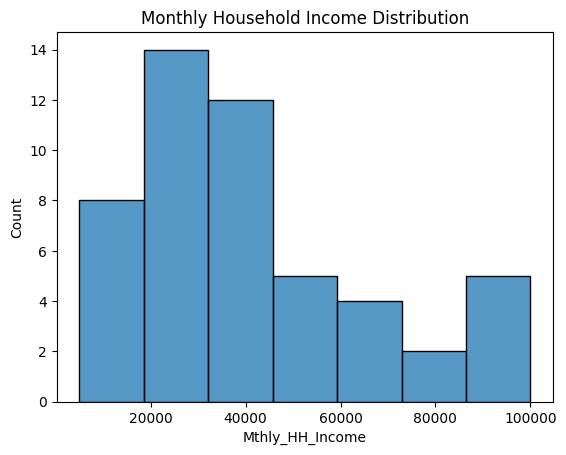

In [21]:

sns.histplot(income_expenditure['Mthly_HH_Income'])
plt.title("Monthly Household Income Distribution")
plt.show()

Plot: **Monthly Household Income Distribution**

The distribution is right-skewed, meaning most households earn on the lower end, and fewer households earn very high incomes.

The majority of households fall in the ₹20,000–₹40,000 income range.

In [22]:
income_expenditure['Mthly_HH_Income'].min()

5000

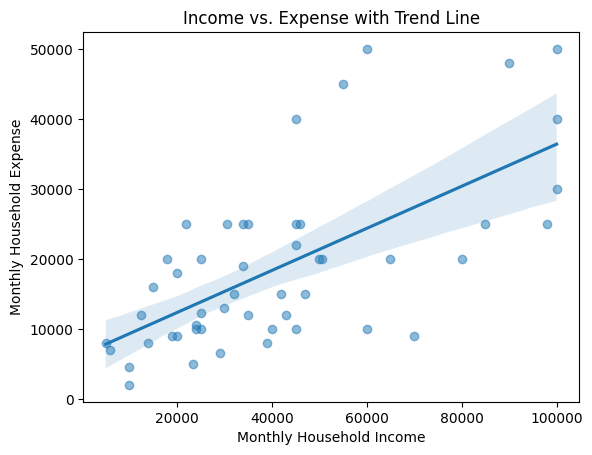

In [23]:
sns.regplot(x='Mthly_HH_Income', y='Mthly_HH_Expense', data=income_expenditure, scatter_kws={'alpha':0.5})
plt.title("Income vs. Expense with Trend Line")
plt.xlabel("Monthly Household Income")
plt.ylabel("Monthly Household Expense")
plt.show()

Plot : **Income vs. Expense with Trend Line**

Most households spend more as they earn more, but the spending rate isn’t fixed—some save aggressively, while others spend nearly all they earn or more.

The shaded area around the trend line represents the confidence interval.

It shows that while there’s a clear trend, there's also considerable variation, especially at higher income levels.

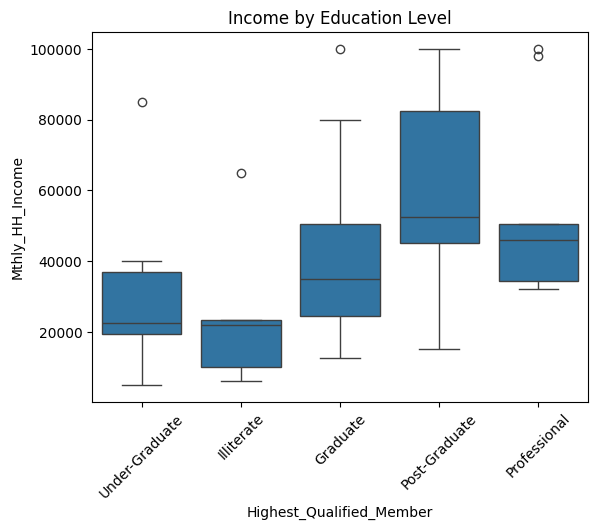

In [24]:
sns.boxplot(x='Highest_Qualified_Member', y='Mthly_HH_Income', data=income_expenditure)
plt.title("Income by Education Level")
plt.xticks(rotation=45)
plt.show()

Plot: **Income by Education Level**

**Median income increases as education level rises:**

Illiterate → Lowest income

Post-Graduate → Highest income

This reinforces the positive impact of education on earning potential.

 **Widest Spread for Graduates & Post-Graduates:**

The interquartile range (IQR) is much larger for Graduate and Post-Graduate groups.

Suggests that while higher education opens up earning opportunities, income can still vary widely due to job type, industry, or location.

**Professional Degree ≠ Highest Income:**

Surprisingly, the Professional group has less variation and slightly lower median income than Post-Graduates.

Could reflect:

Certain professional degrees being industry-limited

Smaller sample size

Non-linear career paths

**Outliers at All Levels:**

Especially in the Illiterate and Graduate groups, some households earn significantly above the typical range.

These could represent business owners, inheritances, or anomalies.

### Food cost varying by region

In [27]:
food_prices = pd.read_csv(data_path/"Food Prices.csv")

In [28]:
food_prices.shape

(1020600, 6)

In [29]:
food_prices.head(5)

,Year,Month,EFPG_code,Metroregion_code,Attribute,Value
0,2012,1,10000,National,Total weighted monthly sales in U.S. dollars,2.493734e+08
1,2012,1,10000,National,Total weighted monthly quantities in grams,4.875195e+10
2,2012,1,10000,National,Total unweighted monthly sales in U.S. dollars,1.629852e+08
3,2012,1,10000,National,Total unweighted monthly quantities in grams,3.217558e+10
4,2012,1,10000,National,Number of stores in geographic area,4.178100e+04


In [30]:
food_prices.EFPG_code.unique()

array([10000, 10025, 10050, 10075, 15000, 15025, 15050, 15075, 20000,
       20075, 21500, 21525, 21550, 21575, 23000, 23075, 24500, 24525,
       24550, 24575, 26000, 26525, 26550, 26575, 27500, 27550, 27575,
       29000, 29025, 29050, 29075, 30000, 30025, 30050, 30075, 30090,
       35000, 35050, 35075, 40000, 40030, 40060, 43000, 43030, 43060,
       46000, 46050, 50000, 50050, 50075, 51500, 51550, 51575, 53000,
       53050, 53075, 54500, 54550, 56000, 57500, 59000, 60000, 62500,
       65000, 67500, 70000, 70050, 71000, 71050, 72000, 72010, 72020,
       72030, 72040, 72050, 72060, 73000, 73010, 73020, 73030, 73040,
       73050, 73060, 74000, 74050, 75000, 75050, 76000, 77000, 78000])

In [31]:
food_prices.Metroregion_code.unique()

array(['National', 'Census Region 1: Northeast',
       'Census Region 2: Midwest', 'Census Region 3: South',
       'Census Region 4: West', 'Atlanta-Sandy Springs-Roswell, GA',
       'Boston-Cambridge-Newton, MA-NH',
       'Chicago-Naperville-Elgin, IL-IN-WI',
       'Dallas-Fort Worth-Arlington, TX', 'Detroit-Warren-Dearborn, MI',
       'Houston-The Woodlands-Sugar Land, TX',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Miami-Fort Lauderdale-West Palm Beach, FL',
       'New York-Newark-Jersey City, NY-NJ-PA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD', '0', '1', '2', '3',
       '4'], dtype=object)

In [32]:
len(food_prices.EFPG_code.unique())

90

In [33]:
food_prices.Attribute.unique()

array(['Total weighted monthly sales in U.S. dollars',
       'Total weighted monthly quantities in grams',
       'Total unweighted monthly sales in U.S. dollars',
       'Total unweighted monthly quantities in grams ',
       'Number of stores in geographic area',
       'Weighted mean unit value per 100 grams',
       'Standard error of weighted mean unit value',
       'Unweighted mean unit value per 100 grams',
       'Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula'],
      dtype=object)

In [34]:
price_df = food_prices.pivot_table(
    index=['Year', 'Month', 'EFPG_code', 'Metroregion_code'],
    columns='Attribute',
    values='Value',
    aggfunc='mean'
).reset_index()

In [35]:
# price_df = food_prices[food_prices['Attribute'] == 'Weighted mean unit value per 100 grams']

In [36]:
price_df['Unit_Price_USD_per_gram'] = price_df['Total weighted monthly sales in U.S. dollars'] / price_df['Total weighted monthly quantities in grams']

In [37]:
price_df.head(5)

Attribute,Year,Month,EFPG_code,Metroregion_code,Number of stores in geographic area,"Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula",Standard error of weighted mean unit value,Total unweighted monthly quantities in grams,Total unweighted monthly sales in U.S. dollars,Total weighted monthly quantities in grams,Total weighted monthly sales in U.S. dollars,Unweighted mean unit value per 100 grams,Weighted mean unit value per 100 grams,Unit_Price_USD_per_gram
0,2012,1,10000,"Atlanta-Sandy Springs-Roswell, GA",971.0,0.921250,0.001315,7.193918e+08,3.492452e+06,9.287381e+08,4.529438e+06,0.485473,0.487698,0.004877
1,2012,1,10000,"Boston-Cambridge-Newton, MA-NH",673.0,0.995061,0.006835,6.960863e+08,3.800866e+06,8.790101e+08,4.976761e+06,0.546034,0.566178,0.005662
2,2012,1,10000,Census Region 1: Northeast,6830.0,0.977012,0.002370,6.142840e+09,3.386973e+07,9.487943e+09,5.231058e+07,0.551369,0.551337,0.005513
3,2012,1,10000,Census Region 2: Midwest,7422.0,0.909709,0.001554,6.169714e+09,2.822913e+07,1.027154e+10,4.726901e+07,0.457544,0.460194,0.004602
4,2012,1,10000,Census Region 3: South,20171.0,0.935265,0.000604,1.260220e+10,6.323597e+07,1.682248e+10,8.555468e+07,0.501785,0.508574,0.005086


In [38]:
yearly_price_by_region = price_df.groupby(['Year', 'Metroregion_code']).agg({'Unit_Price_USD_per_gram':'mean'
}).reset_index()


In [39]:
yearly_price_by_region

Attribute,Year,Metroregion_code,Unit_Price_USD_per_gram
0,2012,0,0.005529
1,2012,1,0.005867
2,2012,2,0.005384
3,2012,3,0.005471
4,2012,4,0.005713
...,...,...,...
135,2018,"Los Angeles-Long Beach-Anaheim, CA",0.006567
136,2018,"Miami-Fort Lauderdale-West Palm Beach, FL",0.006300
137,2018,National,0.005520
138,2018,"New York-Newark-Jersey City, NY-NJ-PA",0.006790


In [40]:
# # Plot
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=yearly_price_by_region, x='Year', y='Unit_Price_USD_per_gram', hue='Metroregion_code',
#     marker='o'
# )

# plt.title('Yearly Food Cost Variation by Region', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Average Unit Price (USD per gram)', fontsize=14)
# plt.grid(True)
# plt.legend(title='Region')
# plt.tight_layout()
# plt.show()
import plotly.express as px

# Create interactive plot
fig = px.line(
    yearly_price_by_region,
    x='Year',
    y='Unit_Price_USD_per_gram',
    color='Metroregion_code',
    markers=True,
    title='Yearly Food Cost Variation by Region'
)

# Update axis labels clearly
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Unit Price (USD per gram)',
    legend_title='Metroregion'
)

# Show interactive figure
fig.show()


Plot: **Yearly Food Cost Variation by Region**

Across multiple years, New York-Newark-Jersey City consistently records the highest average unit price, highlighting persistent affordability challenges in this region.

Boston and Los Angeles also maintain higher prices consistently compared to other regions.


In [41]:
price_df.shape

(113400, 14)

## Dietary Habits Analysis

### Dietary pattern analysis

In [44]:
dietary_pattern = pd.read_csv(data_path/"Dietary Habits Survey Data.csv")

In [45]:
dietary_pattern.shape

(78, 27)

In [46]:
dietary_pattern.columns

Index(['Age', 'Gender',
       'How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)',
       'What would best describe your diet:',
       'Choose all that apply: [I skip meals]',
       'Choose all that apply: [I experience feelings of hunger during the day]',
       'Choose all that apply: [I consult a nutritionist/dietician]',
       'Choose all that apply: [I cook my own meals]',
       'What would you consider to be the main meal of YOUR day?',
       'What does your diet mostly consist of and how is it prepared?',
       'How many times a week do you order-in or go out to eat?',
       'Are you allergic to any of the following? (Tick all that apply)',
       'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
       'What is your weekly food intake frequency of the following food categories: [Salty foods]',
       'What is your weekly food intake frequen

In [47]:
dietary_pattern.head(5)

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,...,What is your weekly food intake frequency of the following food categories: [Meat],What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN


In [48]:
# Renaming columns
# Drop the empty unnamed column clearly
dietary_habits_df_cleaned = dietary_pattern.dropna(axis=1, how='all')

# Simplify long column names clearly
dietary_habits_df_cleaned.columns = [
    'Age', 'Gender', 'Meals_Per_Day', 'Diet_Description', 'Skip_Meals',
    'Hunger_Feelings', 'Consult_Nutritionist', 'Cook_Own_Meals', 'Main_Meal',
    'Diet_Composition', 'Eat_Out_Frequency', 'Allergies', 'Sweet_Food_Intake',
    'Salty_Food_Intake', 'Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake',
    'Oily_Fried_Food_Intake', 'Meat_Intake', 'Seafood_Intake', 'Tea_Intake',
    'Coffee_Intake', 'Soft_Drink_Intake', 'Fruit_Juice_Intake',
    'Dairy_Beverage_Intake', 'Alcohol_Intake', 'Water_Intake'
]

# Verify the cleaning
dietary_habits_df_cleaned.head()


,Age,Gender,Meals_Per_Day,Diet_Description,Skip_Meals,Hunger_Feelings,Consult_Nutritionist,Cook_Own_Meals,Main_Meal,Diet_Composition,...,Oily_Fried_Food_Intake,Meat_Intake,Seafood_Intake,Tea_Intake,Coffee_Intake,Soft_Drink_Intake,Fruit_Juice_Intake,Dairy_Beverage_Intake,Alcohol_Intake,Water_Intake
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Less often,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Often,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Less often,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Few times a week,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Few times a week,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups


<ipython-input-49-e4bb34bf4e7e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-49-e4bb34bf4e7e>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




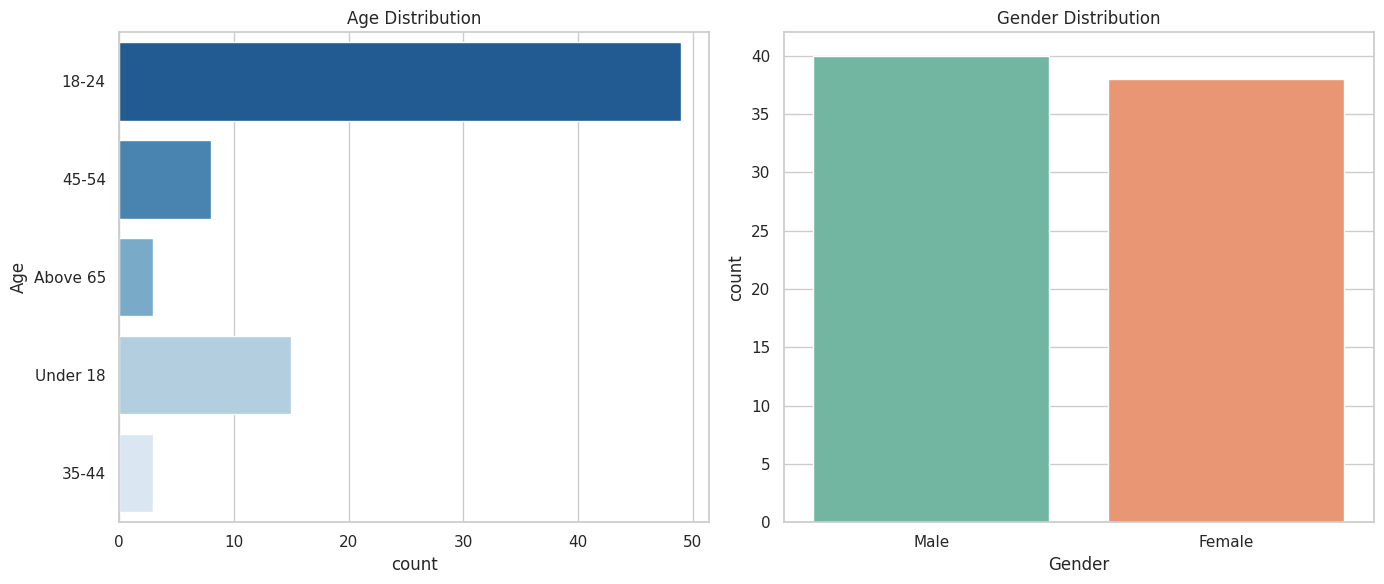

In [49]:

# Setting visualization styles clearly
sns.set(style='whitegrid')

# Plot demographics clearly (Age and Gender distributions)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age Distribution
sns.countplot(y='Age', data=dietary_habits_df_cleaned, ax=axes[0], palette='Blues_r')
axes[0].set_title('Age Distribution')

# Gender Distribution
sns.countplot(x='Gender', data=dietary_habits_df_cleaned, ax=axes[1], palette='Set2')
axes[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

Plot : **Demographic Overview of Dietary Survey Respondents**

The majority of participants are in the 18–24 age group, suggesting the sample is youth-dominated and may reflect early-adulthood food habits.

A smaller portion belongs to older age brackets (45+ and under 18), making the dataset less representative of senior or child nutrition trends.

Gender distribution is nearly balanced, with a slight majority of males over females, supporting gender-neutral interpretation in most analyses.

<ipython-input-50-02b5708f66ce>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-02b5708f66ce>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




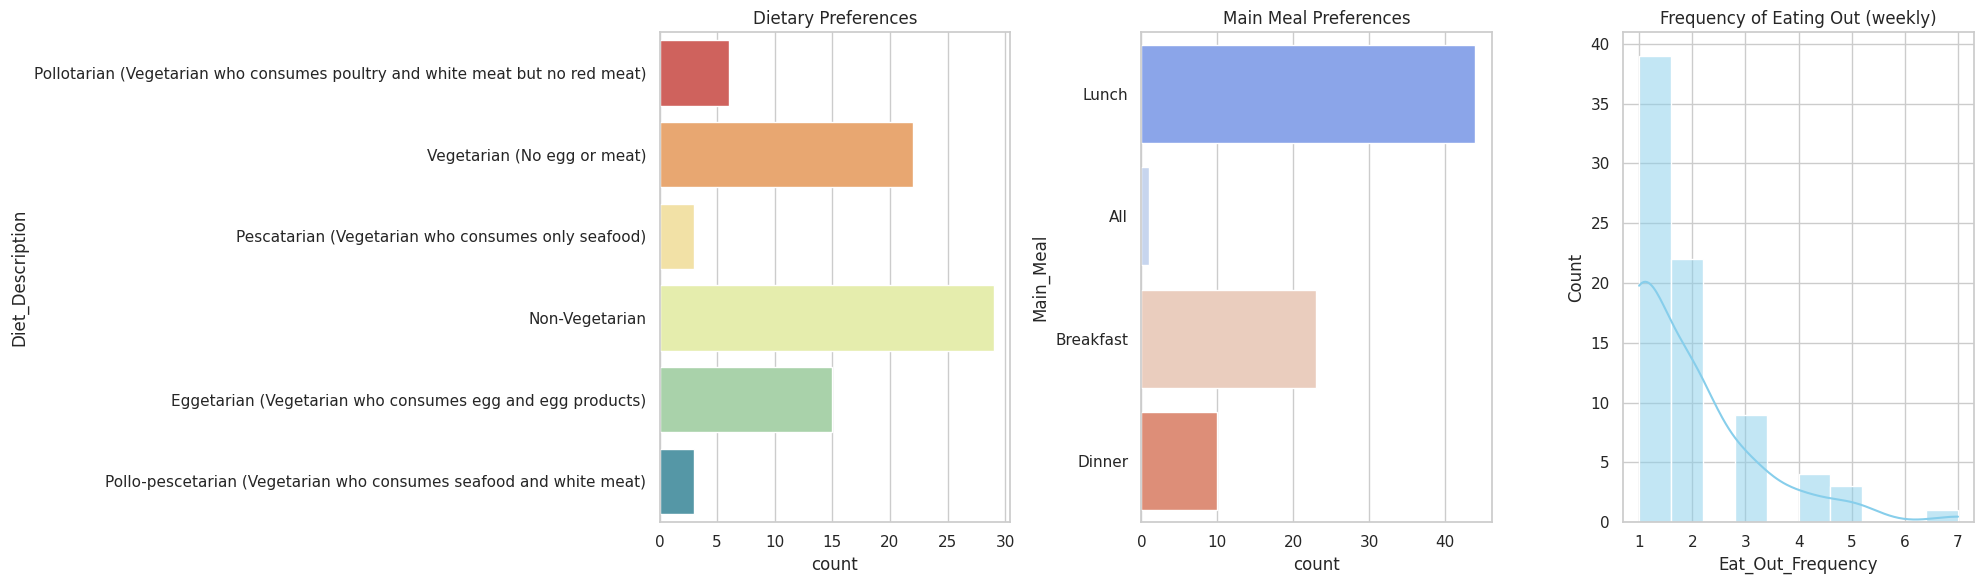

In [50]:
# Clearly visualize dietary patterns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Dietary Preferences Distribution
sns.countplot(y='Diet_Description', data=dietary_habits_df_cleaned, ax=axes[0], palette='Spectral')
axes[0].set_title('Dietary Preferences')

# Main Meal Preferences Distribution
sns.countplot(y='Main_Meal', data=dietary_habits_df_cleaned, ax=axes[1], palette='coolwarm')
axes[1].set_title('Main Meal Preferences')

# Frequency of Eating Out
sns.histplot(dietary_habits_df_cleaned['Eat_Out_Frequency'], bins=10, kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Frequency of Eating Out (weekly)')

plt.tight_layout()
plt.show()


Plot : Summary of Dietary Behavior Patterns

1. Dietary Preferences:
The majority of participants identify as Non-Vegetarian, followed by Vegetarian and Eggetarian.

Specialized diets like Pescatarian and Pollotarian are rare, indicating that traditional dietary categories still dominate.

2. Main Meal Preferences:
Lunch is overwhelmingly preferred as the main meal of the day.

Fewer people consider breakfast or dinner as their most significant meal, while very few selected All meals equally.

3. Eating Out Frequency:
Most participants eat out once or twice a week, with a sharp drop-off after that.

The right-skewed distribution shows eating out is occasional rather than habitual for most.

<ipython-input-51-f98962a89f83>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Water Intake Frequency')

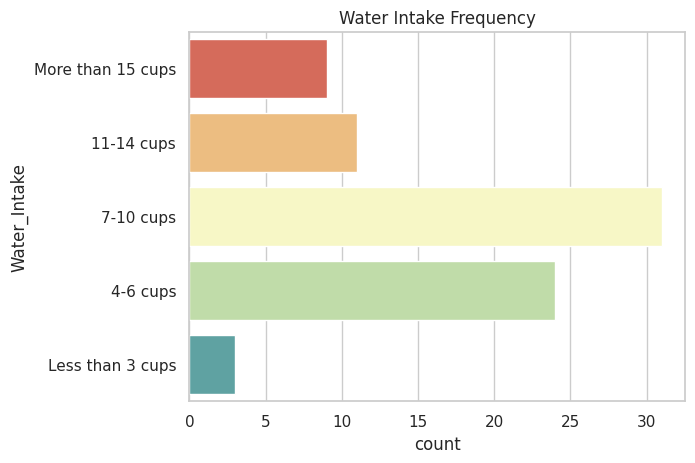

In [51]:
dietary_habits_df_cleaned.Water_Intake.unique()
#water intake
# fig, axes = plt.subplots(1, 1, figsize=(20, 6))

# Dietary Preferences Distribution
sns.countplot(y='Water_Intake', data=dietary_habits_df_cleaned, palette='Spectral')
plt.title('Water Intake Frequency')

Plot :  **Water Intake Frequency**

- 7–10 cups is the most common intake range, followed by 4–6 cups—these two categories cover the majority of respondents.
- Very few respondents report drinking less than 3 cups per day, which is below the recommended hydration level.

In [52]:
unhealthy_diet = ['Sweet_Food_Intake',
    'Salty_Food_Intake',
    'Oily_Fried_Food_Intake']
health_diet = [ 'Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake']

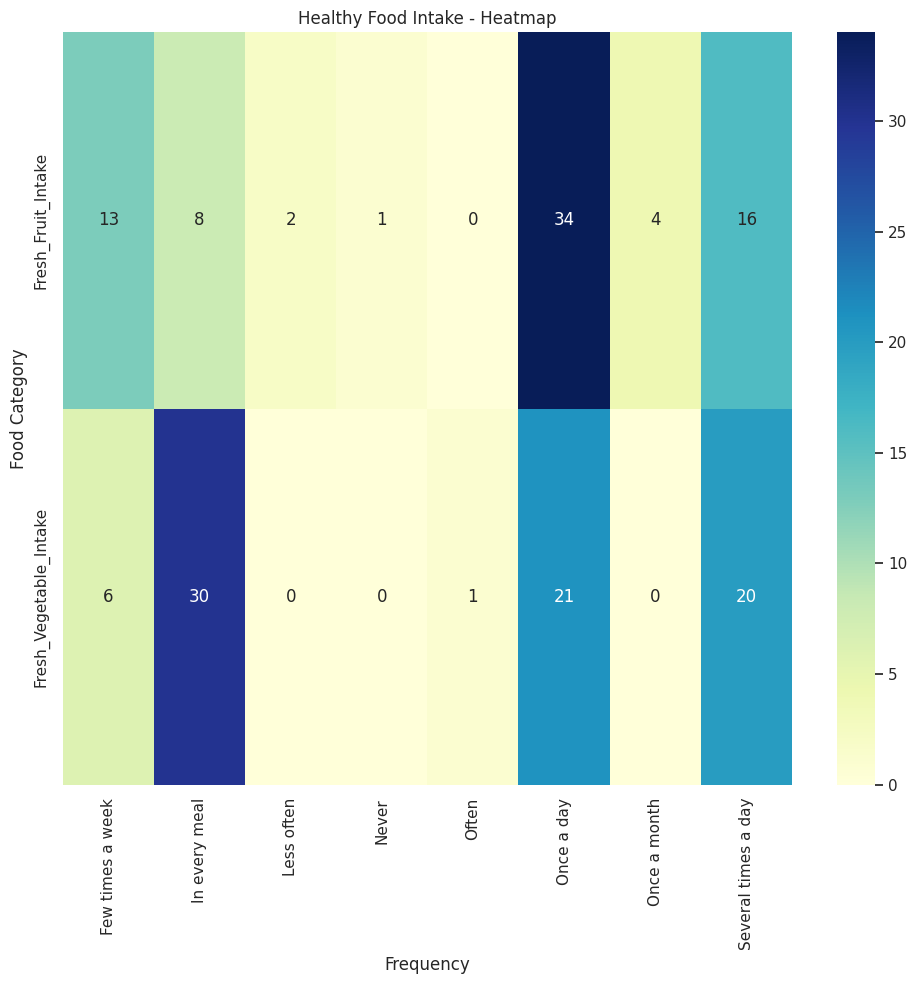

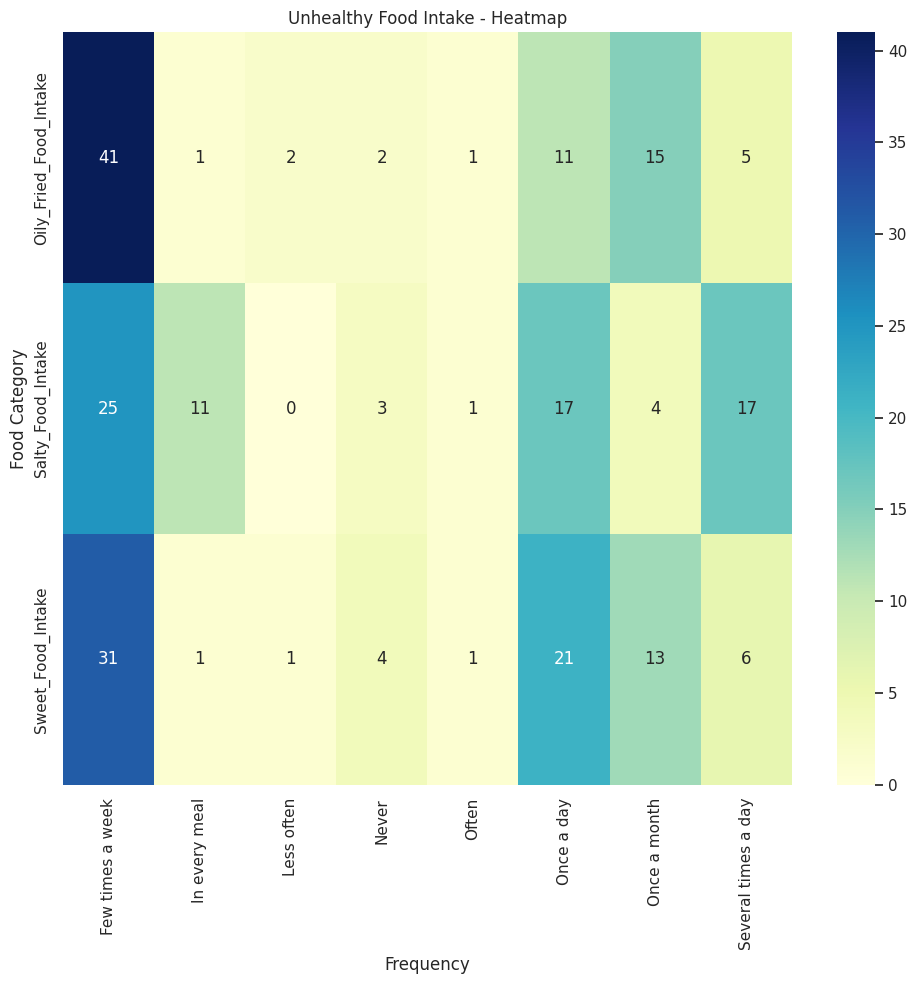

In [53]:
import seaborn as sns

# Create frequency matrix
def plot_heatmap(cols, title):
    df = dietary_habits_df_cleaned[cols].melt(var_name='Food_Type', value_name='Frequency')
    heatmap_data = pd.crosstab(df['Food_Type'], df['Frequency'])

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(title)
    plt.ylabel('Food Category')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot heatmaps
plot_heatmap(['Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake'], 'Healthy Food Intake - Heatmap')
plot_heatmap(['Sweet_Food_Intake', 'Salty_Food_Intake', 'Oily_Fried_Food_Intake'], 'Unhealthy Food Intake - Heatmap')


Plot : **Healthy and Unhealthy Foods intake frequency wise**

Fresh fruits and vegetables are consumed frequently by many respondents — commonly once a day or several times a day.
Oily/fried foods are consumed once a day or few times a week by many respondents — suggesting a higher intake than ideal.

Salty and sweet food intake is also frequent for a notable number of people.

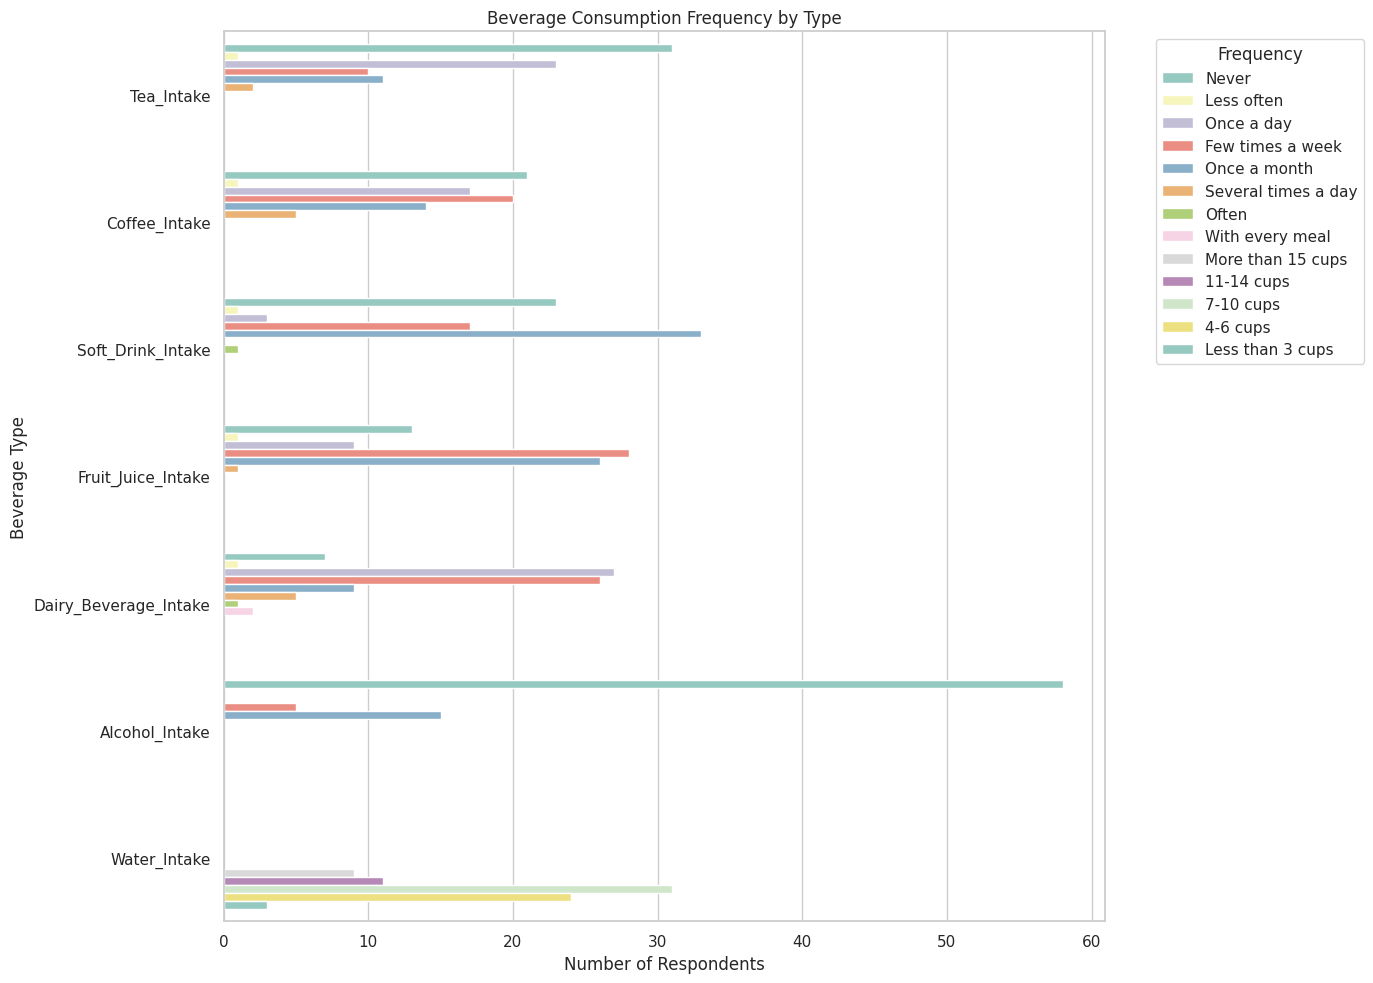

In [54]:
# Explore beverage consumption patterns

# List of beverage-related columns
beverage_columns = [
    'Tea_Intake', 'Coffee_Intake', 'Soft_Drink_Intake',
    'Fruit_Juice_Intake', 'Dairy_Beverage_Intake', 'Alcohol_Intake', 'Water_Intake'
]

# Melt the data into long format for plotting
beverage_df = dietary_habits_df_cleaned[beverage_columns].melt(var_name='Beverage_Type', value_name='Frequency')

# Create a countplot grouped by frequency for each beverage
plt.figure(figsize=(14, 10))
sns.countplot(data=beverage_df, y='Beverage_Type', hue='Frequency', palette='Set3')
plt.title('Beverage Consumption Frequency by Type')
plt.xlabel('Number of Respondents')
plt.ylabel('Beverage Type')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Plot: **Beverage Consumption Frequency by Type**

Tea and Coffee are consumed regularly by a significant portion, with many having them once a day or a few times a week.

Soft drinks and fruit juices are consumed less often or once a month by most respondents, which is healthier behavior.

Alcohol has very low frequency overall—mostly never or once a month.

Dairy beverages (milk, smoothies, etc.) are relatively popular, often consumed once a day or a few times a week.

In [55]:
dietary_habits_df_cleaned['Tea_Intake'].unique()

array(['Never', 'Less often', 'Once a day', 'Few times a week',
       'Once a month', 'Several times a day'], dtype=object)

In [56]:
dietary_habits_df_cleaned['Dairy_Beverage_Intake'].unique()

array(['Less often', 'Often', 'Once a day', 'Few times a week',
       'Several times a day', 'Never', 'With every meal', 'Once a month'],
      dtype=object)

In [57]:
dietary_habits_df_cleaned['Fruit_Juice_Intake'].unique()

array(['Never', 'Once a day', 'Less often', 'Once a month',
       'Few times a week', 'Several times a day'], dtype=object)

In [58]:
beverage_columns = [
    'Tea_Intake', 'Coffee_Intake', 'Soft_Drink_Intake',
    'Fruit_Juice_Intake', 'Dairy_Beverage_Intake', 'Alcohol_Intake', 'Water_Intake'
]

In [59]:

dietary_habits_df_cleaned['Soft_Drink_Intake'].unique()

array(['Less often', 'Often', 'Never', 'Once a month', 'Few times a week',
       'Once a day'], dtype=object)

In [60]:
dietary_habits_df_cleaned['Alcohol_Intake'].unique()

array(['Never', 'Once a month', 'Few times a week'], dtype=object)

In [61]:
dietary_habits_df_cleaned['Coffee_Intake'].unique()

array(['Never', 'Less often', 'Once a day', 'Once a month',
       'Several times a day', 'Few times a week'], dtype=object)

In [62]:
 # 'Never','Less often', 'Often', 'Once a month', 'Few times a week',
 #       'Once a day', 'With every meal', 'Several times a day',

<ipython-input-63-2dddd8d92d45>:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-63-2dddd8d92d45>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




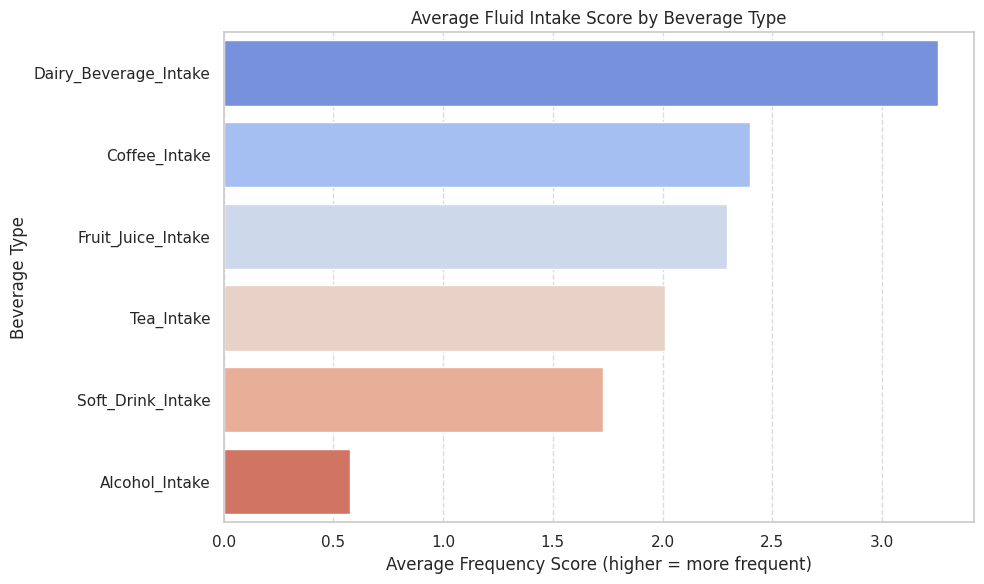

In [63]:
# Frequency mapping
frequency_order = [
    'Never', 'Less often', 'Once a month', 'Few times a week',
    'Once a day', 'Often', 'Several times a day', 'With every meal'
]
frequency_score_map = {label: i for i, label in enumerate(frequency_order)}

# Convert beverage frequencies to scores
beverage_scores = dietary_habits_df_cleaned[
    ['Tea_Intake', 'Coffee_Intake', 'Soft_Drink_Intake',
     'Fruit_Juice_Intake', 'Dairy_Beverage_Intake', 'Alcohol_Intake']
].applymap(lambda x: frequency_score_map.get(x, 0))

# Calculate mean score for each beverage
beverage_means = beverage_scores.mean().sort_values(ascending=False)

# Plot comparison bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=beverage_means.values, y=beverage_means.index, palette='coolwarm')
plt.title('Average Fluid Intake Score by Beverage Type')
plt.xlabel('Average Frequency Score (higher = more frequent)')
plt.ylabel('Beverage Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot: **Average Fluid Intake Score by Beverage Type**

Dairy Beverages (milk, smoothies, etc.) are consumed most frequently on average.

Tea and Coffee follow closely, indicating regular daily or near-daily consumption.

Fruit Juices are consumed moderately.

Soft Drinks and Alcohol have the lowest average intake scores, suggesting occasional or rare consumption, which aligns with healthier habits.

### Relation Between Diet and fluids

In [64]:
dietary_habits_df_cleaned.head(3)

,Age,Gender,Meals_Per_Day,Diet_Description,Skip_Meals,Hunger_Feelings,Consult_Nutritionist,Cook_Own_Meals,Main_Meal,Diet_Composition,...,Oily_Fried_Food_Intake,Meat_Intake,Seafood_Intake,Tea_Intake,Coffee_Intake,Soft_Drink_Intake,Fruit_Juice_Intake,Dairy_Beverage_Intake,Alcohol_Intake,Water_Intake
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Less often,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Often,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Less often,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups


In [65]:
dietary_habits_df_cleaned['Fresh_Fruit_Intake'].unique()

array(['Less often', 'In every meal', 'Several times a day', 'Once a day',
       'Once a month', 'Few times a week', 'Never'], dtype=object)

In [66]:
dietary_habits_df_cleaned['Fresh_Vegetable_Intake'].unique()

array(['Once a day', 'Often', 'In every meal', 'Several times a day',
       'Few times a week'], dtype=object)

In [67]:
dietary_habits_df_cleaned['Sweet_Food_Intake'].unique()

array(['Less often', 'Often', 'Once a day', 'Few times a week',
       'Once a month', 'Several times a day', 'Never', 'In every meal'],
      dtype=object)

In [68]:
dietary_habits_df_cleaned['Salty_Food_Intake'].unique()

array(['Once a day', 'Often', 'Several times a day', 'Few times a week',
       'Once a month', 'In every meal', 'Never'], dtype=object)

In [69]:
dietary_habits_df_cleaned['Oily_Fried_Food_Intake'].unique()

array(['Less often', 'Often', 'Few times a week', 'Once a month',
       'Once a day', 'Several times a day', 'Never', 'In every meal'],
      dtype=object)

In [70]:
dietary_habits_df_cleaned.replace('In every meal', 'With every meal', inplace=True)

<ipython-input-70-c48737c99406>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
dietary_habits_df_cleaned['Oily_Fried_Food_Intake'].unique()

array(['Less often', 'Often', 'Few times a week', 'Once a month',
       'Once a day', 'Several times a day', 'Never', 'With every meal'],
      dtype=object)

In [72]:
dietary_habits_df_cleaned['Water_Intake'].unique()

array(['More than 15 cups', '11-14 cups', '7-10 cups', '4-6 cups',
       'Less than 3 cups'], dtype=object)

In [73]:
frequency_order = [
    'Never', 'Less often', 'Once a month', 'Few times a week',
    'Once a day', 'Often', 'Several times a day', 'With every meal'
]

In [74]:
frequency_score_map = {label: i for i, label in enumerate(frequency_order)}

In [75]:
frequency_score_map

{'Never': 0,
 'Less often': 1,
 'Once a month': 2,
 'Few times a week': 3,
 'Once a day': 4,
 'Often': 5,
 'Several times a day': 6,
 'With every meal': 7}

In [76]:
dietary_habits_df_cleaned['Healthy_Score'] = dietary_habits_df_cleaned[['Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake']].applymap(lambda x: frequency_score_map.get(x, 0)).mean(axis=1)
dietary_habits_df_cleaned['Unhealthy_Score'] = dietary_habits_df_cleaned[['Sweet_Food_Intake', 'Salty_Food_Intake', 'Oily_Fried_Food_Intake']].applymap(lambda x: frequency_score_map.get(x, 0)).mean(axis=1)
dietary_habits_df_cleaned['Drink_Score'] = dietary_habits_df_cleaned[['Soft_Drink_Intake', 'Alcohol_Intake']].applymap(lambda x: frequency_score_map.get(x, 0)).mean(axis=1)
dietary_habits_df_cleaned['Hydration_Score'] = dietary_habits_df_cleaned[['Tea_Intake', 'Coffee_Intake', 'Fruit_Juice_Intake', 'Dairy_Beverage_Intake']].applymap(lambda x: frequency_score_map.get(x, 0)).mean(axis=1)

<ipython-input-76-aab0c4b0264f>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-76-aab0c4b0264f>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-76-aab0c4b0264f>:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-76-aab0c4b0264f>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [77]:
dietary_scores_df = dietary_habits_df_cleaned[['Healthy_Score', 'Unhealthy_Score', 'Drink_Score', 'Hydration_Score']]


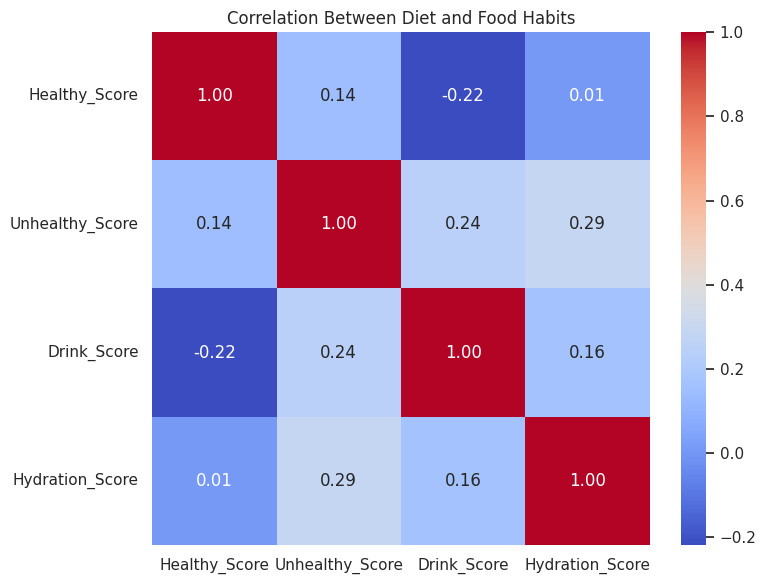

In [78]:
# Correlation matrix visualization
corr_matrix = dietary_scores_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Diet and Food Habits")
plt.tight_layout()
plt.show()

Plot : **Correlation Between Diet and Fluid Habits**

**Healthy_Score vs. Drink_Score: -0.22**
Negative correlation: People who eat more fruits and vegetables tend to drink fewer soft drinks and alcohol.

**Unhealthy_Score vs. Drink_Score: +0.24**
Moderate positive correlation: Those who consume more sweet/salty/fried foods also tend to drink more soft drinks and alcohol.

**Unhealthy_Score vs. Hydration_Score: +0.29**
Mild positive correlation: People who eat unhealthy foods may also drink tea, coffee, juice, etc. This could reflect mixed dietary habits or compensatory behavior.

**Healthy_Score vs. Hydration_Score: 0.01**
Virtually no correlation: Surprisingly, healthy eaters do not necessarily drink more fluids like juice or milk. Might be worth deeper exploration—possibly due to varied beverage preferences.

<ipython-input-79-46ce867e444a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-46ce867e444a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




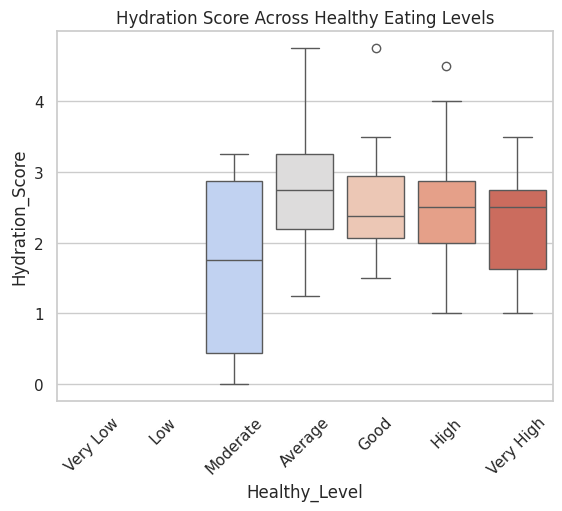

In [79]:
# Bin Healthy Score into categories
dietary_scores_df['Healthy_Level'] = pd.cut(dietary_scores_df['Healthy_Score'], bins=[0, 1, 2, 3, 4, 5, 6, 7], labels=[
    'Very Low', 'Low', 'Moderate', 'Average', 'Good', 'High', 'Very High'])

sns.boxplot(data=dietary_scores_df, x='Healthy_Level', y='Hydration_Score', palette='coolwarm')
plt.title('Hydration Score Across Healthy Eating Levels')
plt.xticks(rotation=45)
plt.show()

Plot : **Hydration Score Across Healthy Eating Levels**

No Strong Upward or Downward Trend.

Groups like Moderate and Low show wider variability in hydration behavior—some drink a lot, others very little. This suggests more inconsistent fluid habits among people with moderate healthy eating.

A few individuals in the Very High and Good categories have very high hydration scores, but they're not representative of the whole group.

Most groups have median hydration scores around 2–3, suggesting similar central behavior regardless of diet quality.


In [80]:
print("Male correlation:", dietary_habits_df_cleaned[dietary_habits_df_cleaned['Gender'] == 'Male'][['Healthy_Score', 'Hydration_Score']].corr().iloc[0,1])
print("Female correlation:", dietary_habits_df_cleaned[dietary_habits_df_cleaned['Gender'] == 'Female'][['Healthy_Score', 'Hydration_Score']].corr().iloc[0,1])

Male correlation: -0.017099392684173927
Female correlation: 0.040000350138523794


The lack of correlation across both genders confirms what the boxplot already hinted:
→ Hydration behavior is largely independent of healthy food intake.


In [81]:
drink_components = ['Tea_Intake', 'Coffee_Intake', 'Fruit_Juice_Intake', 'Dairy_Beverage_Intake']

# Convert to scores
drink_breakdown = dietary_habits_df_cleaned[drink_components].applymap(lambda x: frequency_score_map.get(x, 0))
drink_breakdown['Healthy_Score'] = dietary_habits_df_cleaned['Healthy_Score']

# Correlate with Healthy_Score
corr = drink_breakdown.corr()['Healthy_Score'].drop('Healthy_Score')
print(corr)

Tea_Intake               0.083920
Coffee_Intake           -0.085672
Fruit_Juice_Intake       0.056925
Dairy_Beverage_Intake   -0.032859
Name: Healthy_Score, dtype: float64


<ipython-input-81-c4739d67483a>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



**Positively Correlated:**
Tea (+0.084) and Fruit Juice (+0.057):

People who eat more fruits and vegetables slightly tend to drink more tea and juice.

These could be perceived as healthier drink options, especially juice.

**Negatively Correlated:**
Coffee (−0.086) and Dairy Beverages (−0.033):

Those with healthier diets may prefer to limit dairy or avoid caffeine (e.g., skipping coffee).

Coffee is often consumed regardless of diet, perhaps for energy/work reasons rather than hydration.



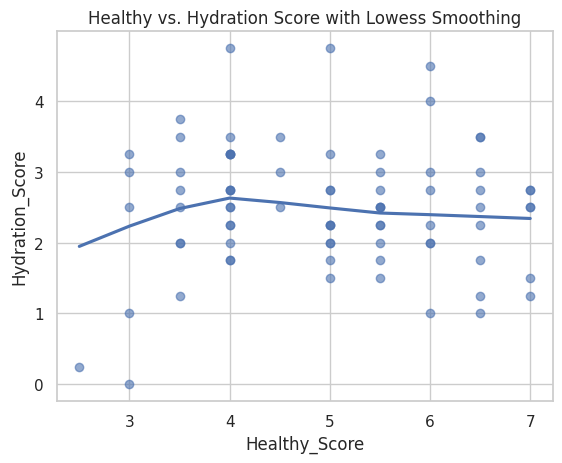

In [82]:
sns.regplot(data=dietary_habits_df_cleaned, x='Healthy_Score', y='Hydration_Score', lowess=True, scatter_kws={'alpha':0.6})
plt.title("Healthy vs. Hydration Score with Lowess Smoothing")
plt.grid(True)
plt.show()

Plot :  **Another plot to explore relation between diet and fluid in more depth**

The relationship between healthy food intake and fluid intake is weak and non-linear.

Some healthy eaters do not necessarily hydrate better, possibly due to avoiding sugary or dairy drinks.

Moderately healthy eaters show the best hydration balance, perhaps adopting overall lifestyle improvements without extreme dietary restrictions.

<ipython-input-83-d060fbf4b753>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-d060fbf4b753>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




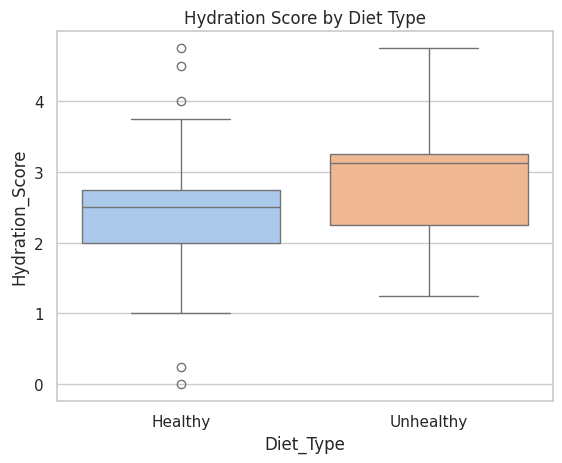

In [83]:
# Classify based on behavior
dietary_scores_df['Diet_Type'] = dietary_scores_df.apply(
    lambda row: 'Healthy' if row['Healthy_Score'] > row['Unhealthy_Score'] else 'Unhealthy', axis=1)
sns.boxplot(data=dietary_scores_df, x='Diet_Type', y='Hydration_Score', palette

            ='pastel')
plt.title("Hydration Score by Diet Type")
plt.show()

Plot : **Hydration Score by Diet Type**

Surprisingly, unhealthy eaters tend to hydrate more—but this doesn't necessarily mean better hydration.

Their fluid intake comes from less nutritious sources (e.g., soft drinks, sweetened lassi, sugary coffee).

In [84]:
drink_components = ['Tea_Intake', 'Coffee_Intake', 'Fruit_Juice_Intake', 'Dairy_Beverage_Intake']

# Convert to scores
drink_breakdown = dietary_habits_df_cleaned[drink_components].applymap(lambda x: frequency_score_map.get(x, 0))
drink_breakdown['Unhealthy_Score'] = dietary_habits_df_cleaned['Unhealthy_Score']

# Correlate with Healthy_Score
corr = drink_breakdown.corr()['Unhealthy_Score'].drop('Unhealthy_Score')
print(corr)

Tea_Intake               0.208963
Coffee_Intake           -0.073715
Fruit_Juice_Intake       0.346697
Dairy_Beverage_Intake    0.216520
Name: Unhealthy_Score, dtype: float64


<ipython-input-84-1bc94500f531>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Although we usually associate fruit juice and dairy drinks with health, in this dataset, people with unhealthy eating habits drink them more frequently, perhaps in sugar-rich or processed forms.

This helps explain why Unhealthy Dieters had higher Hydration Scores in earlier boxplots.

### Relation between Diet and Water Intake

In [85]:
dietary_habits_df_cleaned.Water_Intake.unique()

array(['More than 15 cups', '11-14 cups', '7-10 cups', '4-6 cups',
       'Less than 3 cups'], dtype=object)

In [86]:
# Define mapping
water_score_map = {
    'Less than 3 cups': 1,
    '4-6 cups': 2,
    '7-10 cups': 3,
    '11-14 cups': 4,
    'More than 15 cups': 5
}

In [87]:
dietary_habits_df_cleaned['Water_Score'] = dietary_habits_df_cleaned['Water_Intake'].map(water_score_map)


In [88]:
correlation_with_water = dietary_habits_df_cleaned[['Healthy_Score', 'Unhealthy_Score', 'Water_Score']].corr()
print(correlation_with_water['Water_Score'].drop('Water_Score'))

Healthy_Score      0.127073
Unhealthy_Score   -0.142937
Name: Water_Score, dtype: float64


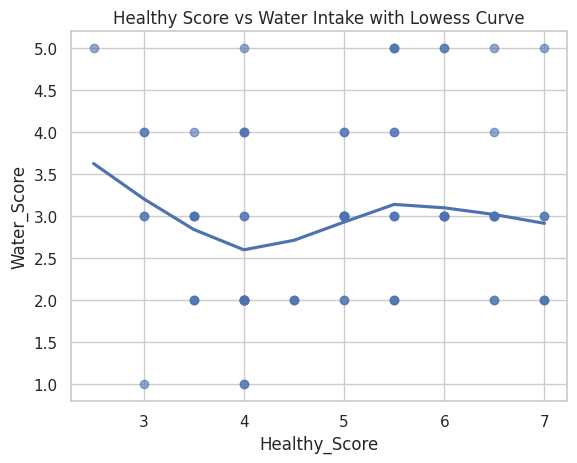

In [89]:
sns.regplot(data=dietary_habits_df_cleaned, x='Healthy_Score', y='Water_Score', lowess=True, scatter_kws={'alpha': 0.6})
plt.title("Healthy Score vs Water Intake with Lowess Curve")
plt.grid(True)
plt.show()

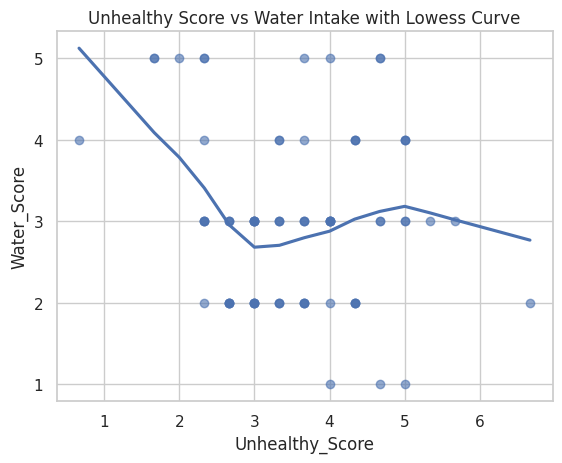

In [90]:
sns.regplot(data=dietary_habits_df_cleaned, x='Unhealthy_Score', y='Water_Score', lowess=True, scatter_kws={'alpha': 0.6})
plt.title("Unhealthy Score vs Water Intake with Lowess Curve")
plt.grid(True)
plt.show()

Plot : **Water Score vs Healthy and Unhealthy diet**

People on the extremes (very healthy or very indulgent) may be more aware of their hydration needs.

Those with moderate unhealthy eating may either not realize the importance of water or replace water with other drinks.

### Healthy and Unhealthy food cost anaysis

In [92]:
food_prices = pd.read_csv(data_path/"Food Prices.csv")
food_dim = pd.read_csv(data_path/'Food_Prices_Dimension_Table.csv')

In [93]:
# Pivot the food_prices dataset to get sales and quantities side-by-side
pivoted_prices = food_prices.pivot_table(
    index=['Year', 'Month', 'EFPG_code', 'Metroregion_code'],
    columns='Attribute',
    values='Value',
    aggfunc='mean'
).reset_index()

# Rename columns for easier access
pivoted_prices.columns.name = None
pivoted_prices.rename(columns={
    'Total weighted monthly sales in U.S. dollars': 'Monthly_Sales_USD',
    'Total weighted monthly quantities in grams': 'Monthly_Quantities_Grams'
}, inplace=True)

# Drop rows with missing sales or quantity
pivoted_prices.dropna(subset=['Monthly_Sales_USD', 'Monthly_Quantities_Grams'], inplace=True)

# Calculate unit price per gram
pivoted_prices['Unit_Price_USD_per_gram'] = pivoted_prices['Monthly_Sales_USD'] / pivoted_prices['Monthly_Quantities_Grams']

# Merge with food dimension table to get food names and health categories
merged_food_data = pivoted_prices.merge(food_dim, on='EFPG_code', how='left')

# Show preview of merged data with calculated unit price
merged_food_data[['EFPG_name', 'Tier 1 group', 'Unit_Price_USD_per_gram']].head()


,EFPG_name,Tier 1 group,Unit_Price_USD_per_gram
0,Whole-grain breads,Grains,0.004877
1,Whole-grain breads,Grains,0.005662
2,Whole-grain breads,Grains,0.005513
3,Whole-grain breads,Grains,0.004602
4,Whole-grain breads,Grains,0.005086


In [94]:
merged_food_data.columns

Index(['Year', 'Month', 'EFPG_code', 'Metroregion_code',
       'Number of stores in geographic area',
       'Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula',
       'Standard error of weighted mean unit value',
       'Total unweighted monthly quantities in grams ',
       'Total unweighted monthly sales in U.S. dollars',
       'Monthly_Quantities_Grams', 'Monthly_Sales_USD',
       'Unweighted mean unit value per 100 grams',
       'Weighted mean unit value per 100 grams', 'Unit_Price_USD_per_gram',
       'EFPG_name', 'Tier 1 group', 'Tier 2 group'],
      dtype='object')

In [95]:
merged_food_data.shape

(114660, 17)

In [96]:
merged_food_data['Tier 1 group'].unique()

array(['Grains', 'Vegetables', 'Fruit', 'Dairy', 'Meat and Protein Foods',
       nan, 'Prepared meals, sides, and salads', 'Other foods'],
      dtype=object)

In [97]:
food_dim['Tier 1 group'].unique()

array(['Grains', 'Vegetables', 'Fruit', 'Dairy', 'Meat and Protein Foods',
       'Prepared meals, sides, and salads', 'Other foods'], dtype=object)

In [98]:
food_dim.EFPG_code.unique()

array([10000, 10025, 10050, 10075, 15000, 15025, 15050, 15075, 20000,
       20075, 21500, 21525, 21550, 21575, 23000, 23075, 24500, 24525,
       24550, 24575, 26000, 26525, 26550, 26575, 27500, 27550, 27575,
       29000, 29025, 29050, 29075, 30000, 30025, 30050, 30075, 30090,
       35000, 35050, 35075, 40000, 40030, 40060, 43000, 43030, 43060,
       46000, 46050, 50000, 50050, 50075, 51500, 51550, 51575, 53000,
       53050, 53075, 54500, 54550, 57500, 59000, 60000, 62500, 65000,
       67500, 70000, 70050, 71000, 71050, 72000, 72010, 72020, 72030,
       72040, 72050, 72060, 73000, 73010, 73020, 73030, 73040, 73050,
       73060, 74000, 74050, 75000, 75050, 76000, 77000, 78000])

In [99]:
food_prices.EFPG_code.unique()

array([10000, 10025, 10050, 10075, 15000, 15025, 15050, 15075, 20000,
       20075, 21500, 21525, 21550, 21575, 23000, 23075, 24500, 24525,
       24550, 24575, 26000, 26525, 26550, 26575, 27500, 27550, 27575,
       29000, 29025, 29050, 29075, 30000, 30025, 30050, 30075, 30090,
       35000, 35050, 35075, 40000, 40030, 40060, 43000, 43030, 43060,
       46000, 46050, 50000, 50050, 50075, 51500, 51550, 51575, 53000,
       53050, 53075, 54500, 54550, 56000, 57500, 59000, 60000, 62500,
       65000, 67500, 70000, 70050, 71000, 71050, 72000, 72010, 72020,
       72030, 72040, 72050, 72060, 73000, 73010, 73020, 73030, 73040,
       73050, 73060, 74000, 74050, 75000, 75050, 76000, 77000, 78000])

EFPG_code = 56000 not present in food dimension `dataset`

In [100]:
merged_food_data[merged_food_data['Tier 1 group'] == 'Other foods']['Tier 2 group'].unique()

array(['Fats, oils, and salad dressings',
       'Gravies, sauces, condiments, and spices', 'Beverages',
       'Desserts, sweets, and candies', 'Breakfast cereals',
       'Savory snacks', 'Vitamins and meal supplements', 'Baby food',
       'Infant formula'], dtype=object)

In [101]:
Tier_1_food = food_dim['Tier 1 group'].unique().tolist()

In [102]:
for food in Tier_1_food:
    print("Tier 1 food : ", food)
    print("Tier 2 food : ",merged_food_data[merged_food_data['Tier 1 group'] == food]['Tier 2 group'].unique())
    print()

Tier 1 food :  Grains
Tier 2 food :  ['Whole-grain breads, cereal, rice, pasta, and flours'
 'Non-whole-grain breads, cereal, rice, pasta, and flours']

Tier 1 food :  Vegetables
Tier 2 food :  ['Potatoes' 'Other starchy vegetables' 'Tomatoes'
 'Other red and orange vegetables' 'Dark green'
 'Beans, lentils, peas, and legumes' 'Other/mixed vegetables']

Tier 1 food :  Fruit
Tier 2 food :  ['Whole fruit' '100% fruit and vegetable juices']

Tier 1 food :  Dairy
Tier 2 food :  ['Whole milk, yogurt, and cream'
 'Reduced-fat, low-fat, and skim milk, cream, and yogurt' 'Cheese']

Tier 1 food :  Meat and Protein Foods
Tier 2 food :  ['Beef, pork, lamb, veal and game' 'Chicken, turkey, and game birds'
 'Fish and seafood' 'Nuts, nut butters, and seeds'
 'Bacon, sausage, and lunch meats' 'Egg and egg substitutes'
 'Tofu and meat substitutes']

Tier 1 food :  Prepared meals, sides, and salads
Tier 2 food :  ['Ready-to-eat foods' 'Frozen/refrigerated ready-to-heat foods'
 'Shelf-stable ready-to-he

In [103]:
merged_food_data['Tier 1 group'].value_counts(normalize=True)

,proportion
Tier 1 group,
Other foods,0.277778
Vegetables,0.255556
Meat and Protein Foods,0.155556
Fruit,0.088889
Grains,0.088889
Dairy,0.088889
"Prepared meals, sides, and salads",0.044444


In [104]:
healthy_tier2 = [
    'Whole-grain breads, cereal, rice, pasta, and flours',
    'Potatoes', 'Other starchy vegetables', 'Tomatoes',
    'Other red and orange vegetables', 'Dark green',
    'Beans, lentils, peas, and legumes', 'Other/mixed vegetables',
    'Whole fruit', '100% fruit and vegetable juices',
    'Whole milk, yogurt, and cream',
    'Reduced-fat, low-fat, and skim milk, cream, and yogurt',
    'Cheese',
    'Beef, pork, lamb, veal and game', 'Chicken, turkey, and game birds',
    'Fish and seafood', 'Nuts, nut butters, and seeds',
    'Egg and egg substitutes', 'Tofu and meat substitutes'
]

In [105]:
# Define healthy and unhealthy category lists based on manual input
healthy_tiers = {
    'Grains': ['Whole-grain breads, cereal, rice, pasta, and flours'],
    'Vegetables': [
        'Potatoes', 'Other starchy vegetables', 'Tomatoes', 'Other red and orange vegetables',
        'Dark green', 'Beans, lentils, peas, and legumes', 'Other/mixed vegetables'
    ],
    'Fruit': ['Whole fruit', '100% fruit and vegetable juices'],
    'Dairy': [
        'Whole milk, yogurt, and cream',
        'Reduced-fat, low-fat, and skim milk, cream, and yogurt', 'Cheese'
    ],
    'Meat and Protein Foods': [
        'Beef, pork, lamb, veal and game', 'Chicken, turkey, and game birds',
        'Fish and seafood', 'Nuts, nut butters, and seeds',
        'Egg and egg substitutes', 'Tofu and meat substitutes'
    ]
}

# Assign healthy/unhealthy based on Tier 1 and Tier 2 group match
def classify_healthiness(row):
    tier1 = row['Tier 1 group']
    tier2 = row['Tier 2 group']
    if tier1 in healthy_tiers and tier2 in healthy_tiers[tier1]:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Apply classification
merged_food_data['Health_Category'] = merged_food_data.apply(classify_healthiness, axis=1)

# Group by health category and compute average price
avg_prices = merged_food_data.groupby('Health_Category')['Unit_Price_USD_per_gram'].mean().reset_index()


In [106]:
print(avg_prices)

  Health_Category  Unit_Price_USD_per_gram
0         Healthy                 0.005515
1       Unhealthy                 0.006679


On average, unhealthy foods are more expensive than healthy foods in this dataset.

This suggests that the cost of eating healthy is not necessarily higher—in fact, it may be slightly more economical, especially if meals are home-prepared and emphasize whole grains, fruits, vegetables, and proteins.



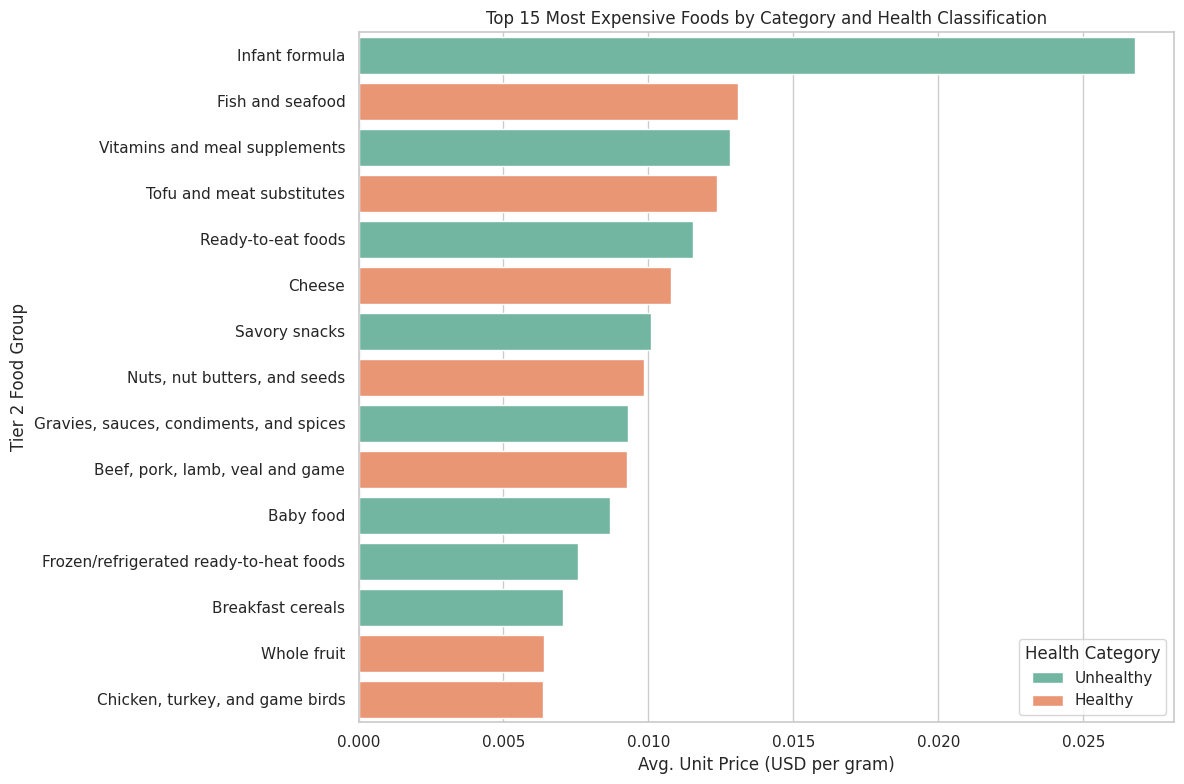

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data: average unit price by food group and health category
groupwise_price = merged_food_data.groupby(
    ['Health_Category', 'Tier 1 group', 'Tier 2 group']
)['Unit_Price_USD_per_gram'].mean().reset_index()

# Sort by price for better visualization
groupwise_price_sorted = groupwise_price.sort_values('Unit_Price_USD_per_gram', ascending=False)

# Plot: top 15 most expensive foods with health labels
plt.figure(figsize=(12, 8))
sns.barplot(
    data=groupwise_price_sorted.head(15),
    x='Unit_Price_USD_per_gram',
    y='Tier 2 group',
    hue='Health_Category',
    palette='Set2'
)
plt.title("Top 15 Most Expensive Foods by Category and Health Classification")
plt.xlabel("Avg. Unit Price (USD per gram)")
plt.ylabel("Tier 2 Food Group")
plt.legend(title="Health Category")
plt.tight_layout()
plt.show()


Plot : **Expensive food exploration by healthy categorization**

This bar chart ranks the 15 most expensive food groups (by USD/gram) and color-codes them as Healthy or Unhealthy.

Healthy (Orange Bars):
Fish and seafood, tofu and meat substitutes, and nuts/seeds are among the most expensive healthy options. These items are nutrient-dense, but their higher cost may affect affordability for low-income groups.
Whole fruit and chicken/turkey are healthier but less expensive, suggesting some affordable healthy choices exist.

Unhealthy (Green Bars):
Items like infant formula, vitamins/supplements, ready-to-eat meals, and savory snacks dominate the top tier.
Shelf-stable convenience foods tend to cost more, likely due to processing, packaging, and branding.

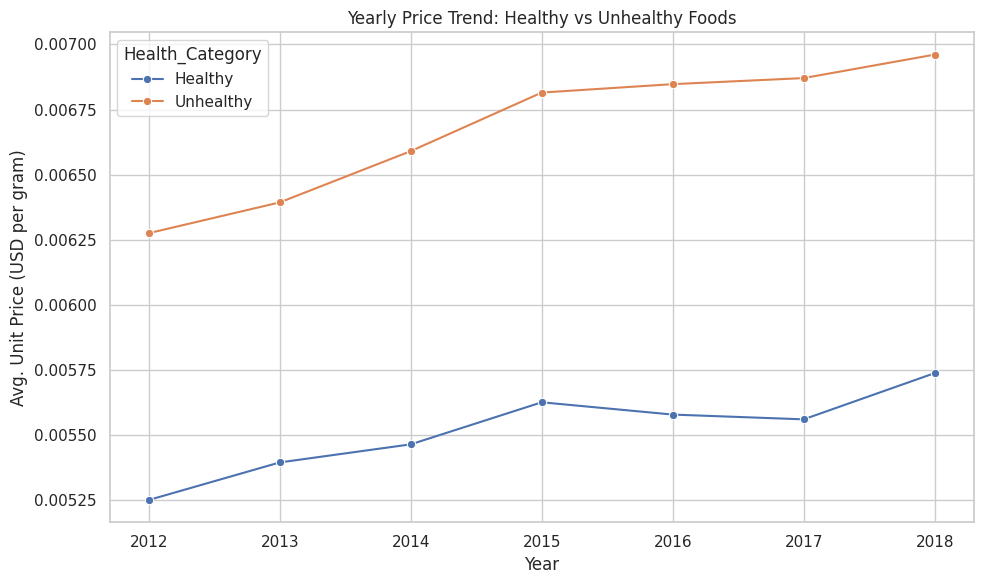

In [108]:
#Visualize healthy vs. unhealthy food price trends by year

# Group by Year and Health_Category to compute average price
yearly_price_trend = merged_food_data.groupby(['Year', 'Health_Category'])['Unit_Price_USD_per_gram'].mean().reset_index()

# Line plot of healthy vs unhealthy prices over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_price_trend, x='Year', y='Unit_Price_USD_per_gram', hue='Health_Category', marker='o')
plt.title("Yearly Price Trend: Healthy vs Unhealthy Foods")
plt.ylabel("Avg. Unit Price (USD per gram)")
plt.grid(True)
plt.tight_layout()
plt.show()

Plot :  **Yearly Price Trend: Healthy vs Unhealthy Foods**

Unhealthy foods have consistently been more expensive per gram across all years.

The price gap has widened slightly from 2012 to 2018.

Healthy and Unhealthy both food's prices have increased year by year.


<ipython-input-109-5ed3dedc3b6c>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




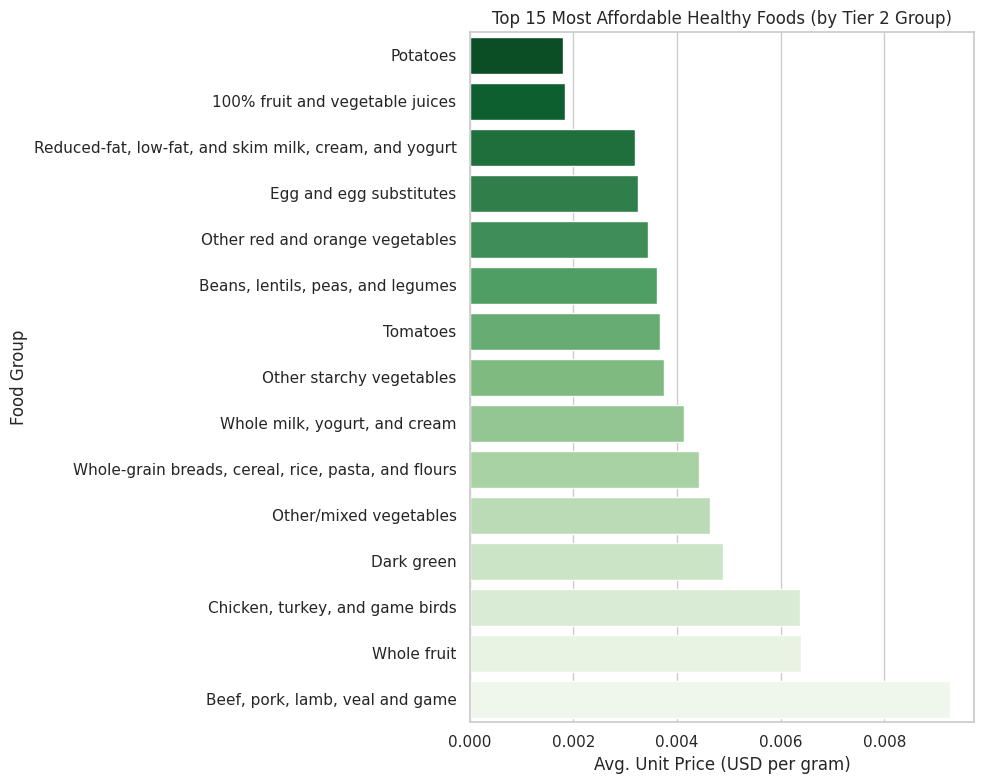

In [109]:
#the most affordable healthy foods for intervention

# Compute average unit price per Tier 2 healthy food
healthy_foods = merged_food_data[merged_food_data['Health_Category'] == 'Healthy']

healthy_food_prices = healthy_foods.groupby('Tier 2 group')['Unit_Price_USD_per_gram'].mean().sort_values().reset_index()

# Plot: Top 15 most affordable healthy foods
plt.figure(figsize=(10, 8))
sns.barplot(data=healthy_food_prices.head(15), x='Unit_Price_USD_per_gram', y='Tier 2 group', palette='Greens_r')
plt.title("Top 15 Most Affordable Healthy Foods (by Tier 2 Group)")
plt.xlabel("Avg. Unit Price (USD per gram)")
plt.ylabel("Food Group")
plt.tight_layout()
plt.show()


Plot : **This chart highlights the cheapest healthy food options, ideal for intervention programs or public policy focus.**

1	🥔 Potatoes	 -                                  Extremely affordable, nutrient-rich

2	🧃 100% Fruit & Vegetable Juices	-           Budget-friendly hydration & vitamins

3	🥛 Low-fat/skim dairy	         -              Affordable calcium & protein source

4	🥚 Egg & egg substitutes	      -             Protein-rich, cost-effective

5	🍅 Tomatoes, legumes, red/orange vegetables	  -  Affordable fiber, antioxidants

## Capturing Regional Patterns

<Figure size 1400x800 with 0 Axes>

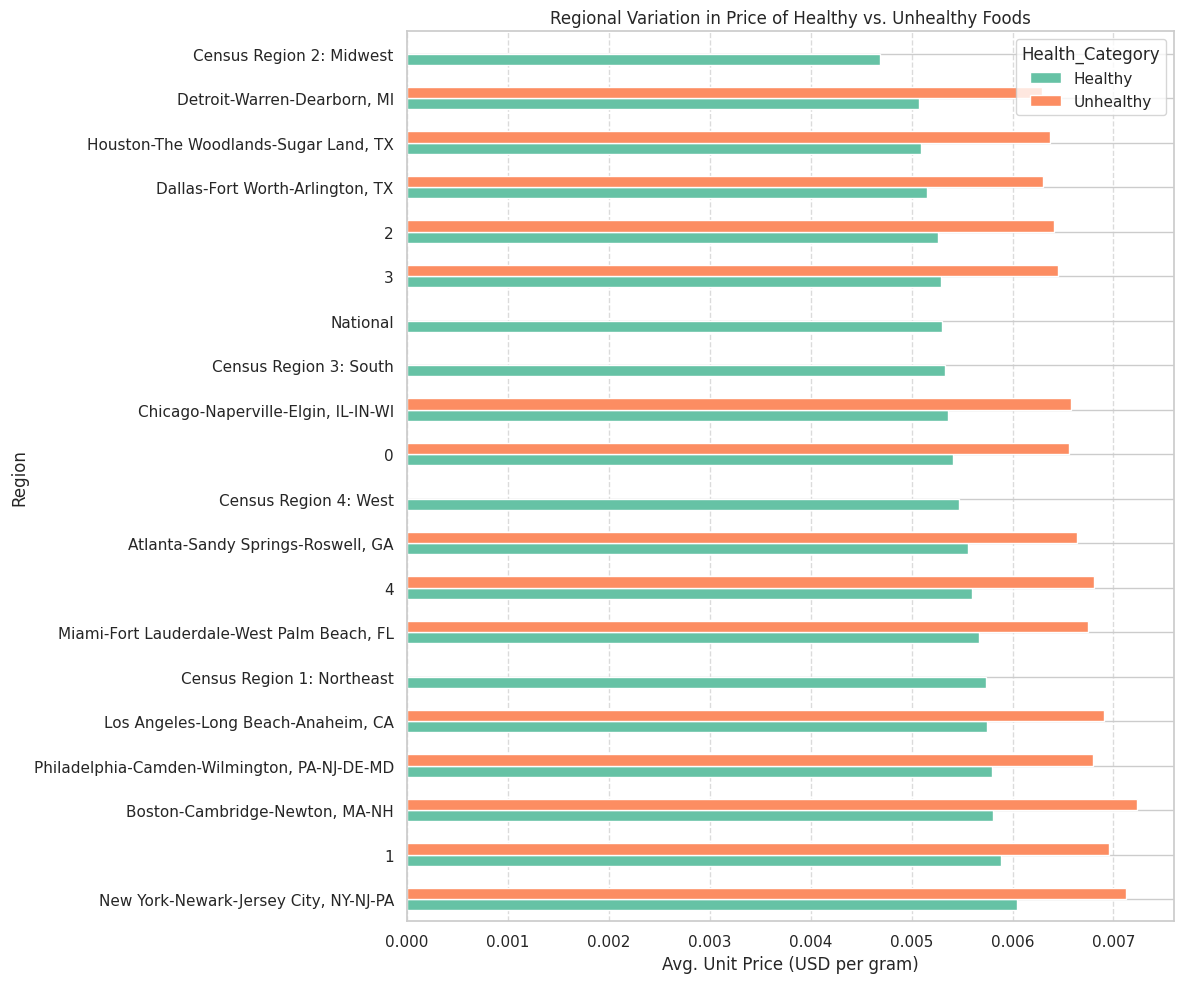

In [110]:
# Compute average prices for both healthy and unhealthy foods by region
regional_prices = merged_food_data.groupby(['Metroregion_code', 'Health_Category'])['Unit_Price_USD_per_gram'].mean().reset_index()

# Pivot for side-by-side comparison
regional_pivot = regional_prices.pivot(index='Metroregion_code', columns='Health_Category', values='Unit_Price_USD_per_gram').reset_index()

# Sort by Healthy food price for consistent plotting
regional_pivot_sorted = regional_pivot.sort_values(by='Healthy', ascending=False)

# Plot as grouped bar chart
plt.figure(figsize=(14, 8))
regional_pivot_sorted.plot(
    kind='barh',
    x='Metroregion_code',
    y=['Healthy', 'Unhealthy'],
    figsize=(12, 10),
    color=['#66c2a5', '#fc8d62']
)
plt.xlabel('Avg. Unit Price (USD per gram)')
plt.ylabel('Region')
plt.title('Regional Variation in Price of Healthy vs. Unhealthy Foods')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Plot : **Region Variation of Healthy and Unhealthy Foods**

In every region, unhealthy foods cost more per gram than healthy ones.

**The price gap is largest in places like:**

- New York-Newark-Jersey City
- Boston-Cambridge-Newton
- Philadelphia-Camden-Wilmington

**Most affordable regions for both categories include:**
- Houston, Detroit, Phoenix, and Dallas

# Final Summary: Relation Between Income, Food Choices, and Affordability

**Household Income & Food Affordability**

Positive correlation between income and monthly expenses: higher-income families spend more—but not always on healthier food.

Disposable income varies widely due to rent and family size, impacting food purchasing power.

**Healthy vs. Unhealthy Food Pricing**

Unhealthy foods are more expensive per gram than healthy foods in nearly every region and year.

Items like infant formula, ready-to-eat meals, savory snacks are among the most costly, whereas vegetables, legumes, eggs, and potatoes are more affordable.

Price trends have remained stable or widened slightly over time—policy inertia may be worsening disparities.



**Regional Variation**

Major metro areas (e.g., New York, Boston, Philadelphia) show higher prices for both healthy and unhealthy foods.

Midwestern and Southern cities (e.g., Detroit, Houston, Dallas) offer more affordable healthy choices.

The price gap between healthy and unhealthy foods is widest in wealthier cities, limiting access for lower-income residents.

**Dietary Behavior Patterns**

Unhealthy eaters tend to consume more sugary beverages and sweetened dairy products.

Healthier eaters favor tea, fruit juice, and drink less coffee, but overall hydration habits are mixed.

Water intake shows a U-shaped trend—high among very healthy and very unhealthy eaters, lower in the middle.



# Recommendations for Policymakers

1. Target High-Cost Metro Areas : Subsidize or support healthy food programs in cities like NYC, Boston, and LA, where healthy food is less affordable.
2. Promote Affordable Healthy Staples : Encourage consumption of potatoes, legumes, eggs, whole fruits, and low-fat dairy—nutritious, low-cost options underutilized by the public.
3. Improve Access to Water and Nutrition Literacy : Ensure communities understand the role of plain water and are not misled by “healthy-seeming” sweetened beverages like juices and lassis.